### Brazillian E commerce Data 

In [1]:
## importing the dependency

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


import re 
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud



pd.pandas.set_option('display.max_columns',None)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
customers_data= pd.read_csv("olist_customers_dataset.csv")
geolocation_data = pd.read_csv("olist_geolocation_dataset.csv")
order_items_data = pd.read_csv("olist_order_items_dataset.csv")
order_payment_data = pd.read_csv("olist_order_payments_dataset.csv")
order_review_data= pd.read_csv("olist_order_reviews_dataset.csv")
order_data =pd.read_csv("olist_orders_dataset.csv")
product_data = pd.read_csv("olist_products_dataset.csv")
seller_data = pd.read_csv("olist_sellers_dataset.csv")
product_category_data = pd.read_csv("product_category_name_translation.csv")

In [3]:
customers_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
geolocation_data.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
order_items_data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
order_payment_data.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
order_review_data.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
order_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
order_review_data.shape

(99224, 7)

In [10]:
list = [customers_data,geolocation_data,order_items_data,order_payment_data,order_review_data,order_data,product_data,seller_data,product_category_data]
for data in list:
    print(data.isnull().sum())
    print("**"*20)

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
****************************************
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
****************************************
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
****************************************
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
****************************************
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247

In [11]:
data

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [12]:
data1=pd.merge(order_data,order_items_data,left_on='order_id',right_on='order_id')

In [13]:
data2=pd.merge(data1,seller_data,left_on='seller_id',right_on='seller_id')

In [14]:
data3=pd.merge(data2,product_data,left_on='product_id',right_on='product_id')

In [15]:
data4=pd.merge(data3,order_review_data,left_on='order_id',right_on='order_id')

In [16]:
data5=pd.merge(data4,product_category_data,left_on='product_category_name',right_on='product_category_name')
df=pd.merge(data5,customers_data,left_on='customer_id',right_on='customer_id')

In [17]:
data=pd.merge(df,order_payment_data,left_on='order_id',right_on='order_id')


In [18]:
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,9350,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,housewares,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1,credit_card,3,37.77
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,9350,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,housewares,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1,credit_card,1,37.77


In [19]:
data.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1195
order_delivered_customer_date      2400
order_estimated_delivery_date         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
seller_zip_code_prefix                0
seller_city                           0
seller_state                          0
product_category_name                 0
product_name_lenght                   0
product_description_lenght            0
product_photos_qty                    0
product_weight_g                      1
product_length_cm                     1
product_height_cm                     1
product_width_cm                      1


In [20]:
### HANDLING THE MISSING VALUE

In [21]:
data['order_delivered_customer_date'].fillna(data['order_estimated_delivery_date'],inplace=True)

In [22]:
data['order_approved_at'].fillna(data['order_purchase_timestamp'],inplace=True)

In [23]:
data.drop(labels="order_delivered_carrier_date",axis=1,inplace=True)

In [24]:
data['product_width_cm'].fillna(data['product_width_cm'].median(),inplace=True)

In [25]:
data['product_height_cm'].fillna(data['product_height_cm'].median(),inplace=True)

In [26]:
data['product_length_cm'].fillna(data['product_length_cm'].median(),inplace=True)

In [27]:
data['product_weight_g'].fillna(data['product_weight_g'].median(),inplace=True)

In [28]:
data.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                     0
order_delivered_customer_date         0
order_estimated_delivery_date         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
seller_zip_code_prefix                0
seller_city                           0
seller_state                          0
product_category_name                 0
product_name_lenght                   0
product_description_lenght            0
product_photos_qty                    0
product_weight_g                      0
product_length_cm                     0
product_height_cm                     0
product_width_cm                      0
review_id                             0


In [29]:
## DATA DUPLICATES 

In [30]:
dup_rows=data[data.duplicated(['order_id','customer_id'])]
dup_rows.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59
7,5f49f31e537f8f1a496454b48edbe34d,a7260a6ccba78544ccfaf43f920b7240,delivered,2017-08-24 11:31:28,2017-08-24 11:45:25,2017-08-28 20:12:20,2017-09-14 00:00:00,1,d4a3b5aa064bf44e74f1e71862bea22a,57c764b4a836300be881e2ff86e449f9,2017-08-30 11:45:25,9.90,3.05,14021,ribeirao preto,SP,utilidades_domesticas,59.0,236.0,1.0,100.0,21.0,9.0,13.0,8899ca945efd951c97107b4966289227,1,NaN,Prezados que porcaria de atendimento ao client...,2017-08-29 00:00:00,2017-08-30 02:26:02,housewares,7a1de9bde89aedca8c5fbad489c5571c,1315,sao paulo,SP,1,credit_card,1,127.45
11,7b419fad2990895cf43c738f8e7d2d55,9ce014a42bfa0fe0ff389adde017bb24,delivered,2017-04-04 09:36:28,2017-04-05 02:45:11,2017-04-12 10:34:50,2017-05-08 00:00:00,2,e251ebd2858be1aa7d9b2087a6992580,001cca7ae9ae17fb1caed9dfb1094831,2017-04-11 02:45:11,139.90,34.63,29156,cariacica,ES,ferramentas_jardim,34.0,511.0,4.0,8875.0,40.0,14.0,43.0,a2b8e70d99e014db2012cfae0936e050,1,NaN,"Todos os produtos vieram errados, cor diferent...",2017-04-13 00:00:00,2017-04-17 21:31:50,garden_tools,1383a85c693c3af1f959f635a1cf9c4f,98600,tres passos,RS,1,boleto,1,260.51
13,407fe646704ea7828e324c8ef7e7e616,8514e0aeceab9ef5bc9c2e86392cd6e6,delivered,2018-07-23 15:44:35,2018-07-25 02:55:20,2018-07-31 17:58:44,2018-08-10 00:00:00,2,3a05a947f28cf46d789adedc107d7595,87142160b41353c4e5fca2360caf6f92,2018-07-27 02:55:20,119.90,39.72,90230,porto alegre,RS,esporte_lazer,57.0,652.0,1.0,3450.0,16.0,15.0,20.0,5634e69c94c442771e2520e6d870b871,5,NaN,NaN,2018-08-01 00:00:00,2018-08-02 13:49:47,sports_leisure,1f53a28536539df3fecec45ae1e212e8,84196,colonia castrolanda,PR,1,boleto,1,445.19


In [31]:
data=data.drop_duplicates(subset={'order_id','customer_id'},keep='first',inplace=False)
data=data.reindex()
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,9350,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,housewares,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1,credit_card,3,37.77
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,9350,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,housewares,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1,credit_card,1,37.77
5,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-11-07 18:04:59,2017-11-13 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,9350,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1bafb430e498b939f258b9c9dbdff9b1,3,NaN,NaN,2017-11-08 00:00:00,2017-11-10 19:52:38,housewares,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,1,boleto,1,44.09
6,5f49f31e537f8f1a496454b48edbe34d,a7260a6ccba78544ccfaf43f920b7240,delivered,2017-08-24 11:31:28,2017-08-24 11:45:25,2017-08-28 20:12:20,2017-09-14 00:00:00,2,be03d93320192443b8fa24c0ca6ead98,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-30 11:45:25,46.80,67.70,9350,maua,SP,utilidades_domesticas,59.0,189.0,3.0,775.0,16.0,16.0,13.0,8899ca945efd951c97107b4966289227,1,NaN,Prezados que porcaria de atendimento ao client...,2017-08-29 00:00:00,2017-08-30 02:26:02,housewares,7a1de9bde89aedca8c5fbad489c5571c,1315,sao paulo,SP,1,credit_card,1,127.45


In [32]:
## DATA ANALYSIS

In [33]:
data[['order_approved_at',
      'order_purchase_timestamp',
      'order_delivered_customer_date',
      'order_estimated_delivery_date']]=data[['order_approved_at',
                                              'order_purchase_timestamp',
                                              'order_delivered_customer_date',
                                              'order_estimated_delivery_date']].apply(pd.to_datetime)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96516 entries, 0 to 115608
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96516 non-null  object        
 1   customer_id                    96516 non-null  object        
 2   order_status                   96516 non-null  object        
 3   order_purchase_timestamp       96516 non-null  datetime64[ns]
 4   order_approved_at              96516 non-null  datetime64[ns]
 5   order_delivered_customer_date  96516 non-null  datetime64[ns]
 6   order_estimated_delivery_date  96516 non-null  datetime64[ns]
 7   order_item_id                  96516 non-null  int64         
 8   product_id                     96516 non-null  object        
 9   seller_id                      96516 non-null  object        
 10  shipping_limit_date            96516 non-null  object        
 11  price         

In [35]:
data.describe()

,order_item_id,price,freight_value,seller_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value
count,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000
mean,1.016692,125.825817,20.219145,24701.327459,48.853558,794.458836,2.250477,2108.042314,30.150721,16.507574,23.060125,4.107412,35163.974543,1.022545,2.919858,157.924421
std,0.146736,189.709395,15.926663,27763.708846,9.993506,654.678059,1.746938,3767.794216,16.163007,13.340748,11.746965,1.329213,29810.746531,0.247935,2.711997,216.773702
min,1.000000,0.850000,0.000000,1001.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,1003.000000,1.000000,0.000000,0.010000
25%,1.000000,41.900000,13.300000,6429.000000,42.000000,350.000000,1.000000,300.000000,18.000000,8.000000,15.000000,4.000000,11368.750000,1.000000,1.000000,60.065000
50%,1.000000,79.000000,16.390000,13660.000000,52.000000,608.000000,2.000000,700.000000,25.000000,13.000000,20.000000,5.000000,24422.000000,1.000000,2.000000,103.190000
75%,1.000000,139.900000,21.260000,29156.000000,57.000000,996.000000,3.000000,1813.000000,38.000000,20.000000,30.000000,5.000000,59015.000000,1.000000,4.000000,175.392500
max,7.000000,6735.000000,409.680000,99730.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,5.000000,99980.000000,27.000000,24.000000,13664.080000


In [36]:
# checking the target variables
data.review_score.value_counts()

5    56185
4    18732
1    10598
3     7978
2     3023
Name: review_score, dtype: int64

In [37]:
def partition(x):
    if x<3:
        return 0
    return 1

data['review_score_new']=data['review_score'].map(lambda cw : partition(cw))

# checking the review score new
data.review_score_new.value_counts()

1    82895
0    13621
Name: review_score_new, dtype: int64

Total positive review : 82895 , ( 85.8873140204733 %)
Total negative review : 13621 , ( 14.11268597952671 %)


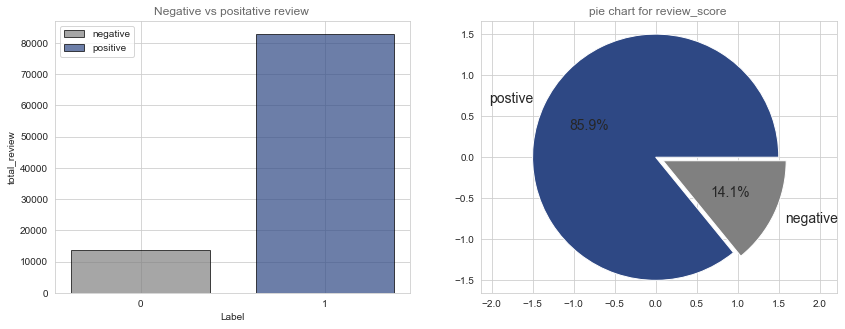

In [38]:
#counting the review score with 1 and 0
y_value_counts = data.review_score_new.value_counts()

#calculating the percentrage of each review type:
print('Total positive review :', y_value_counts[1] , ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print('Total negative review :', y_value_counts[0] , ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

# ploting bar plot and pie plot 

sns.set_style('whitegrid')
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.ylabel('total_review')
plt.xlabel('Label')
plt.title('Negative vs positative review ',color='dimgrey')
plt.xticks([10,10.20],['0','1'])

#creating bar plot
plt.bar(10,13621,color='grey',width=0.15,
        alpha=0.7,label='negative',edgecolor='black')
plt.bar(10.20,82895,color='#2e4884',width=0.15,
        alpha=0.7,label='positive',edgecolor='black')
plt.legend()

# creating the pie plot
plt.subplot(1,2,2)
labels=['postive','negative']
sizes=[82895,13621]
explode=(0,0.1)
color={'#2e4884','grey',}
plt.pie(sizes,explode=explode,colors=color,labels=labels,
        autopct='%1.1f%%',
        shadow=False, startangle=0,
        radius=1.5,labeldistance=1.1,
        textprops={'fontsize': 14},frame=True)
plt.axis('equal')
plt.title('pie chart for review_score ',color='dimgrey')
plt.show()


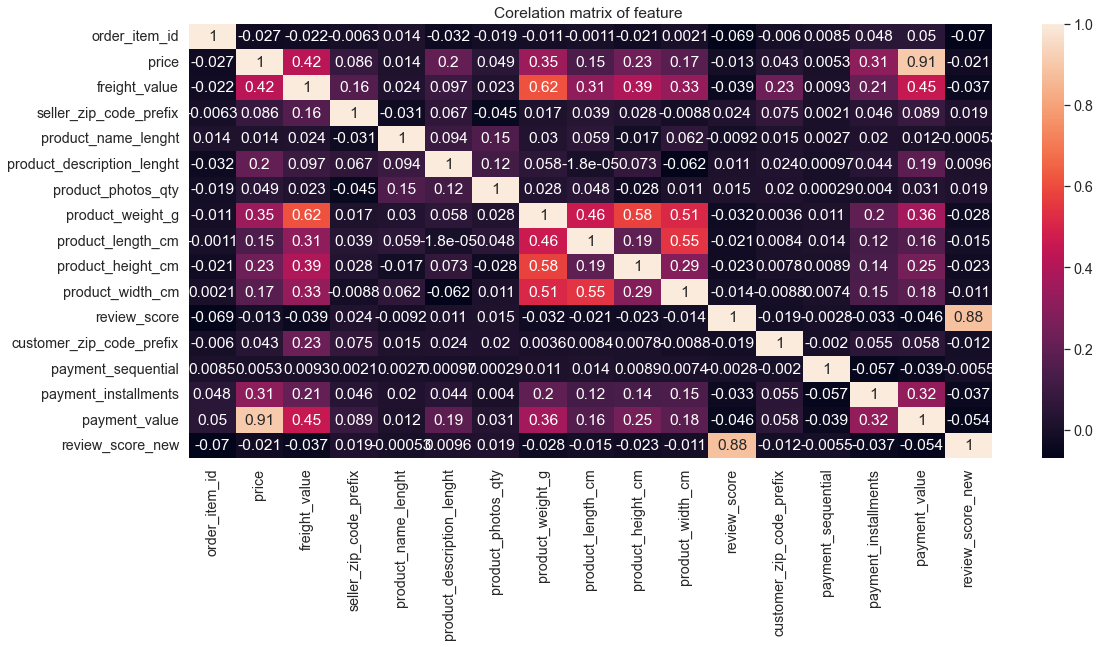

In [39]:
## correlation matrix
corr_matrix= data.corr()

plt.figure(figsize=(18,8))
sns.set(font_scale=1.3)
sns.heatmap(corr_matrix,annot=True)
plt.title('Corelation matrix of feature ')
plt.show()

In [40]:
## univariate Analysis

data.groupby('payment_type').size()

payment_type
boleto         19203
credit_card    73251
debit_card      1484
voucher         2578
dtype: int64

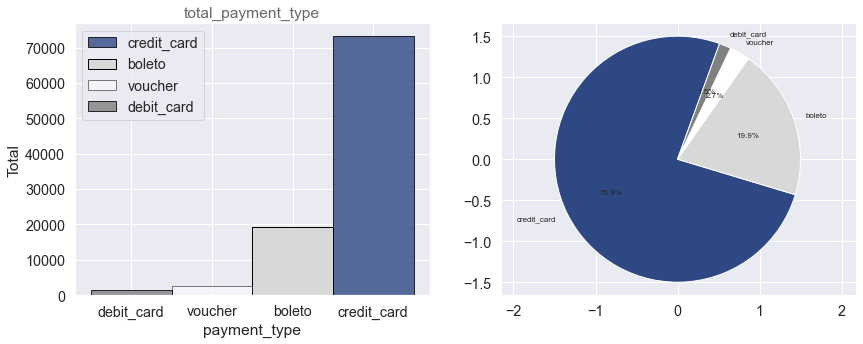

In [41]:
# creating bar plot and pie plot for payment_type data

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.xlabel('payment_type')
plt.ylabel('Total')
plt.title('total_payment_type',color='dimgrey')
plt.xticks([10,10.25,10.50,10.75],['debit_card','voucher','boleto','credit_card'])

#creating bar plot
plt.bar(10.75,73251, color = '#2e4884', width = 0.25,alpha=0.8,label='credit_card',edgecolor='black')
plt.bar(10.50,19203, color = '#d8d8d8', width = 0.25,label='boleto',edgecolor='black')
plt.bar(10.25,2578, color = 'white', width = 0.25,alpha=0.5,label='voucher',edgecolor='black')
plt.bar(10,1484, color = 'grey', width = 0.25,alpha=0.8,label='debit_card',edgecolor='black')


plt.legend()
plt.subplot(1,2,2)
s=[73251,19203,2578,1484]
new=['credit_card',
     'boleto',
    'voucher','debit_card']
explode=(0,0,0,0)
colrs={'credit_card':'#2e4884',
       'boleto':'#d8d8d8',
       'voucher':'w',
       'debit_card':'grey'}

color={'#2e4884','grey','#d8d8d8','w'}

plt.pie(s, explode=explode, labels=new,colors=[colrs[key] for key in new] , autopct='%1.1f%%',shadow=False, startangle=70,radius=1.5,frame=True,textprops={'fontsize': 8})
plt.axis('equal')
plt.show()


In [42]:
# Text analysis


In [43]:
order_review_data.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [44]:
order_review_data.shape

(99224, 7)

In [45]:
review_data_title=order_review_data['review_comment_title']
review_data=order_review_data.drop(['review_comment_title'],axis=1)

In [46]:
## droping the null value 
review_data=review_data.dropna()
review_data_title=review_data_title.dropna()

In [47]:
review_data=review_data.reset_index(drop=True)
review_data.head()
review_data.shape

(40977, 6)

In [48]:
review_data_title=review_data_title.reset_index(drop=True)
review_data_title.shape

(11568,)

In [49]:
import nltk
nltk.download('punkt')

from nltk.stem.porter import PorterStemmer
port_stem=PorterStemmer()
comments=[]
stop_words=set(stopwords.words('portuguese'))

for words in review_data['review_comment_message']:
    only_letters=re.sub('[^a-zA-Z]',' ',words)
    tokens = nltk.word_tokenize(only_letters)
    lower_case = [l.lower() for l in tokens]
    #filtered_result=list(filter(lambda l:l not in stop_words,lower_case))
    filtered_result = [port_stem.stem(words) for words in lower_case if not words in stop_words]
    comments.append(' '.join(filtered_result))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [50]:
comments

['recebi bem ant prazo estipulado',
 'parab ns loja lannist adorei comprar internet seguro pr tico parab ns todo feliz p scoa',
 'aparelho eficient site marca aparelho impresso desinfector chegar outro nome atualizar marca correta vez aparelho',
 'pouco travando valor ta boa',
 'vendedor confi vel produto ok entrega ant prazo',
 'gostaria saber sempr recebi compra agora decpcion',
 'p ssimo',
 'loja nota',
 'obrigado aten amim dispensada',
 'compra realizada facilment entrega efetuada ant prazo dado produto j come usado at present problema',
 'rel gio bonito barato',
 'n gostei comprei gato lebr',
 'sempr compro internet entrega ocorr ant prazo combinado acredito prazo m ximo stark prazo m ximo j esgot ainda n recebi produto',
 'recebi exatament esperava demai encomenda outro vendedor atrasaram chegou prazo',
 'recomendo',
 'boa',
 't completament apaixonada loja super respon vel confi vel',
 'nada chegar pedido',
 'bom cheiroso',
 'otimo vendedor chegou ate ant prazo adorei produto',


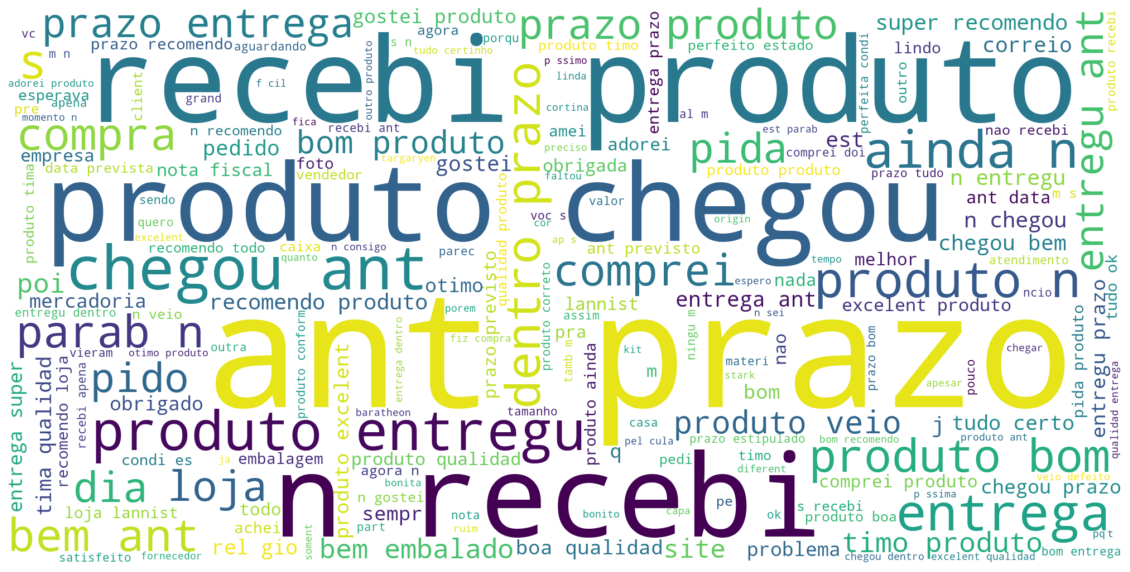

In [51]:
# using wordcloud to visualize  the comments 
unique_string=(" ").join(comments)
wordcloud=WordCloud(width=2000,height=1000,background_color='white').generate(unique_string)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.savefig('plot23.png',dpi=400,bbox_inches='tight')
plt.show()

In [52]:
# further checking by counting the words 
from collections import Counter
words=(' '.join(review_data['review_comment_message'])).lower().split()
counts=Counter(words)

print('Most frequent word:')
sorted(counts.items(),key=lambda x:x[1],reverse=True)[:15]

Most frequent word:


[('o', 18676),
 ('e', 15582),
 ('produto', 15462),
 ('a', 12133),
 ('de', 11296),
 ('do', 11139),
 ('não', 10614),
 ('que', 8271),
 ('muito', 7568),
 ('com', 5574),
 ('antes', 5533),
 ('entrega', 5363),
 ('chegou', 5130),
 ('prazo', 5043),
 ('no', 5038)]

In [53]:
print('least frequent words:')
sorted(counts.items(),key=lambda x:x[1],reverse=False)[:15]

least frequent words:


[('3desinfector', 1),
 ('nome...atualizar', 1),
 (',travando...pelo', 1),
 ('decpcionou', 1),
 ('amim', 1),
 ('dispensada', 1),
 ('atrasaram,', 1),
 ('apaixonada,', 1),
 ('tomara', 1),
 ('pelinho.', 1),
 ('midea', 1),
 ('split', 1),
 ('estilo.', 1),
 ('parceria:', 1),
 ('rápidíssima,', 1)]

# ----------------------------------------------------------------------------------------------------------

In [54]:
## Rfm analysis

PRESENT = datetime(2018,9,3)
rfm= data.groupby('customer_unique_id').agg({'order_purchase_timestamp':lambda date:(PRESENT-date.max()).days,
                                            'order_id':lambda num: len(num),
                                            'payment_value':lambda price: price.sum()})
rfm.columns=['recency','frequency','monetary']
rfm['recency']=rfm['recency'].astype(int)
rfm['frequency']=rfm['frequency'].astype(int)
rfm['monetary']=rfm['monetary'].astype(float)

In [55]:
rfm.head()

,recency,frequency,monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19
0000f46a3911fa3c0805444483337064,541,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62
0004aac84e0df4da2b147fca70cf8255,292,1,196.89


In [56]:
rfm.shape

(93396, 3)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

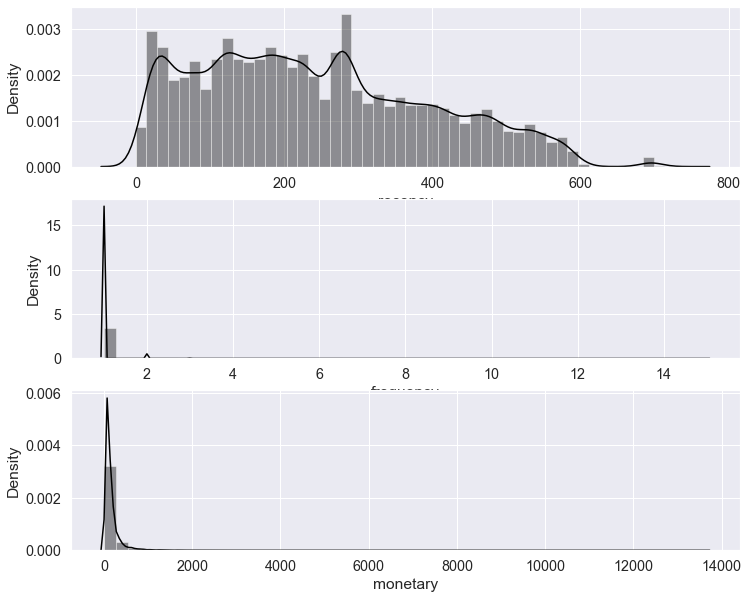

In [57]:
# Plot rfm distributions
plt.figure(figsize=(12,10))
# plot distribution of R
plt.subplot(3,1,1)
sns.distplot(rfm['recency'],color='black')
# plot distribution of f
plt.subplot(3,1,2)
sns.distplot(rfm['frequency'],color='black')
# plot distribution of m
plt.subplot(3,1,3)
sns.distplot(rfm['monetary'],color='black')
# show the plot
plt.show()

In [58]:
def part(x):
    if x<10:
        return 1
    if 10<=x<=35 :
        return 2
    if 35<=x<=50:
        return 3
    if 50<=x<=75:
        return 4
    
rfm['f_quartile']=rfm['frequency'].map(lambda cw : part(cw))

# checking the review score
rfm.f_quartile.value_counts()
r_labels=range(4,0,-1)
m_labels=range(1,5)

rfm['r_quartile']=pd.qcut(rfm['recency'],4,r_labels)
rfm['m_quartile']=pd.qcut(rfm['monetary'],4,m_labels)

In [59]:
rfm['RFM_score']=rfm.r_quartile.astype(str)+rfm.f_quartile.astype(str)+rfm.m_quartile.astype(str)
rfm.head()

,recency,frequency,monetary,f_quartile,r_quartile,m_quartile,RFM_score
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90,1,4,3,413
0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19,1,4,1,411
0000f46a3911fa3c0805444483337064,541,1,86.22,1,1,2,112
0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62,1,2,1,211
0004aac84e0df4da2b147fca70cf8255,292,1,196.89,1,2,4,214


In [60]:
rfm_count_unique = rfm.groupby('RFM_score')['RFM_score'].nunique()
print(rfm_count_unique.sum())
rfm['RFM_score_s']=rfm[['r_quartile','f_quartile','m_quartile']].sum(axis=1)
print(rfm['RFM_score_s'].head())

17
customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    8
0000b849f77a49e4a4ce2b2a4ca5be3f    6
0000f46a3911fa3c0805444483337064    4
0000f6ccb0745a6a4b88665a16c9f078    4
0004aac84e0df4da2b147fca70cf8255    7
Name: RFM_score_s, dtype: int64


In [61]:
def rfm_level(df):
    if df['RFM_score_s'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_score_s'] >= 8) and (df['RFM_score_s'] < 9)):
        return 'Champions'
    elif ((df['RFM_score_s'] >= 7) and (df['RFM_score_s'] < 8)):
        return 'Loyal'
    elif ((df['RFM_score_s'] >= 6) and (df['RFM_score_s'] < 7)):
        return 'Potential'
    elif ((df['RFM_score_s'] >= 5) and (df['RFM_score_s'] < 6)):
        return 'Promising'
    elif ((df['RFM_score_s'] >= 4) and (df['RFM_score_s'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
rfm.head()

,recency,frequency,monetary,f_quartile,r_quartile,m_quartile,RFM_score,RFM_score_s,RFM_Level
customer_unique_id,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90,1,4,3,413,8,Champions
0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19,1,4,1,411,6,Potential
0000f46a3911fa3c0805444483337064,541,1,86.22,1,1,2,112,4,Needs Attention
0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62,1,2,1,211,4,Needs Attention
0004aac84e0df4da2b147fca70cf8255,292,1,196.89,1,2,4,214,7,Loyal


In [62]:
rfm_level_agg=rfm.groupby('RFM_Level').agg({
    'recency':'mean',
    'frequency':'mean',
    'monetary':['mean','count']
}).round(1)

print(rfm_level_agg)
rfm_level_agg_columns=rfm_level_agg.columns.droplevel()

                   recency frequency monetary       
                      mean      mean     mean  count
RFM_Level                                           
Can't Loose Them      62.4       1.1    400.0   6021
Champions            114.8       1.1    257.0  11974
Loyal                171.0       1.0    202.0  17347
Needs Attention      368.1       1.0     62.1  11740
Potential            241.9       1.0    164.7  22927
Promising            300.5       1.0     86.2  17378
Require Activation   459.7       1.0     41.2   6009


In [63]:
rfm.to_pickle('rfm.pkl')
data.to_pickle('final.pkl')

In [64]:
data.to_pickle('final-2.pkl')

# --------------------------------------------------------------------------------

In [ ]:
data

In [66]:
data.to_csv('new_data.csv')